<a href="https://colab.research.google.com/github/bhaveshgandhi1/greatlearningpgaiml/blob/master/Computer_Vision_with_CNNs_R8_INN_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
%matplotlib inline


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
 from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/CNN')

In [ ]:
!ls -ltr

total 776155
drwx------ 4 root root      4096 Dec 28 03:42 plant-seedlings-classification
-rw------- 1 root root  13773305 Dec 28 07:37 ngrok-stable-linux-amd64.zip
drwx------ 4 root root      4096 Dec 28 07:39 tf-log
-rw------- 1 root root  13773305 Dec 28 07:54 ngrok-stable-linux-amd64.zip.1
-rw------- 1 root root  13773305 Dec 28 08:05 ngrok-stable-linux-amd64.zip.2
-rw------- 1 root root  13773305 Dec 28 08:05 ngrok-stable-linux-amd64.zip.3
-rw------- 1 root root  13773305 Dec 28 11:40 ngrok-stable-linux-amd64.zip.4
-rw------- 1 root root  13773305 Dec 28 11:42 ngrok-stable-linux-amd64.zip.5
-rw------- 1 root root   1248960 Dec 28 17:17 weights.aliens.transfer.preprocess.best.hdf5
-rw------- 1 root root  13773305 Dec 29 02:44 ngrok-stable-linux-amd64.zip.6
-rw------- 1 root root  26683198 Dec 29 02:45 ngrok
-rw------- 1 root root   7161808 Dec 30 07:16 weights.plants.transfer.preprocess.best.hdf5
-rw------- 1 root root      6494 Dec 30 07:37 plant_seedling1.json
-rw------- 1 root r

In [ ]:
!ls -R | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

   .
   |-plant-seedlings-classification
   |---test
   |---train
   |-----Black-grass
   |-----Charlock
   |-----Cleavers
   |-----Common Chickweed
   |-----Common wheat
   |-----Fat Hen
   |-----Loose Silky-bent
   |-----Maize
   |-----Scentless Mayweed
   |-----Shepherds Purse
   |-----Small-flowered Cranesbill
   |-----Sugar beet
   |-tf-log
   |---alien_v11
   |-----train
   |-------plugins
   |---------profile
   |-----------2020_12_28_07_40_17
   |-----------2020_12_28_07_56_08
   |-----------2020_12_28_07_56_48
   |-----------2020_12_28_08_07_00
   |-----------2020_12_28_11_43_08
   |-----------2020_12_29_02_45_53
   |-----validation
   |---plants_v11
   |-----train
   |-------plugins
   |---------profile
   |-----------2020_12_29_03_13_55


In [ ]:
batch_size = 32
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
      rescale=1./255.,
      vertical_flip=True, 
      horizontal_flip=True,
      rotation_range=0.4, 
      zoom_range=0.25,
      shear_range=0.1,
      fill_mode='nearest',
      validation_split=0.2
)


In [ ]:
#val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        'plant-seedlings-classification/train',
        subset='training',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'plant-seedlings-classification/train',
        subset='validation',
        batch_size=batch_size,
        class_mode='categorical')


Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


Shepherds Purse


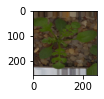

Cleavers


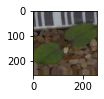

Cleavers


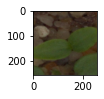

In [ ]:
#Display images from training folder
# **add subplot in the below fig
x,y = train_generator.next()

for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.subplot2grid((3,3),(2,i))
    print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(np.argmax(label))])
    plt.imshow(image)
    plt.show()
    

Scentless Mayweed


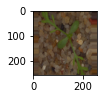

Fat Hen


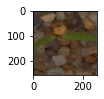

Small-flowered Cranesbill


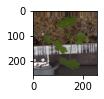

In [ ]:
#Display images from training folder
# **add subplot in the below fig
x,y = validation_generator.next()

for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.subplot2grid((3,3),(2,i))
    print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(np.argmax(label))])
    plt.imshow(image)
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation , BatchNormalization

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

model = Sequential()
#model.add(Dense(64,activation='relu',input_shape = train_generator.image_shape))

#normalize data
model.add(tf.keras.layers.InputLayer(input_shape=(256,256,3)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(64, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))



#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))



#normalize data
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))



#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = len(set(train_generator.classes)), activation = 'softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-02,amsgrad=False)
model.compile(optimizer = opt, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 84, 84, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 32)        1

In [ ]:
# checkpoint
filepath="weights.plants.transfer.preprocess.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
#%load_ext tensorboard

In [ ]:
#log_dir = './tf-log/plants_v11'

In [ ]:
#tb_cb = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [ ]:
batch_size = 32

fitted_model = model.fit(
        train_generator,
        steps_per_epoch= int(train_generator.samples) // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps= int(validation_generator.samples) // batch_size,
        callbacks=[checkpoint]
        )

Epoch 1/100
118/118 [==============================] - 1398s 12s/step - loss: 2.8715 - accuracy: 0.1547 - val_loss: 3.2068 - val_accuracy: 0.1369

Epoch 00001: val_accuracy improved from -inf to 0.13685, saving model to weights.plants.transfer.preprocess.best.hdf5
Epoch 2/100
118/118 [==============================] - 164s 1s/step - loss: 1.7431 - accuracy: 0.4131 - val_loss: 4.2407 - val_accuracy: 0.1358

Epoch 00002: val_accuracy did not improve from 0.13685
Epoch 3/100
118/118 [==============================] - 164s 1s/step - loss: 1.3435 - accuracy: 0.5390 - val_loss: 3.4810 - val_accuracy: 0.1864

Epoch 00003: val_accuracy improved from 0.13685 to 0.18642, saving model to weights.plants.transfer.preprocess.best.hdf5
Epoch 4/100
118/118 [==============================] - 166s 1s/step - loss: 1.1759 - accuracy: 0.6021 - val_loss: 1.5418 - val_accuracy: 0.4601

Epoch 00004: val_accuracy improved from 0.18642 to 0.46013, saving model to weights.plants.transfer.preprocess.best.hdf5
Epo

In [ ]:
train_acc = fitted_model.history['accuracy']
val_acc =fitted_model.history['val_accuracy']

train_loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']

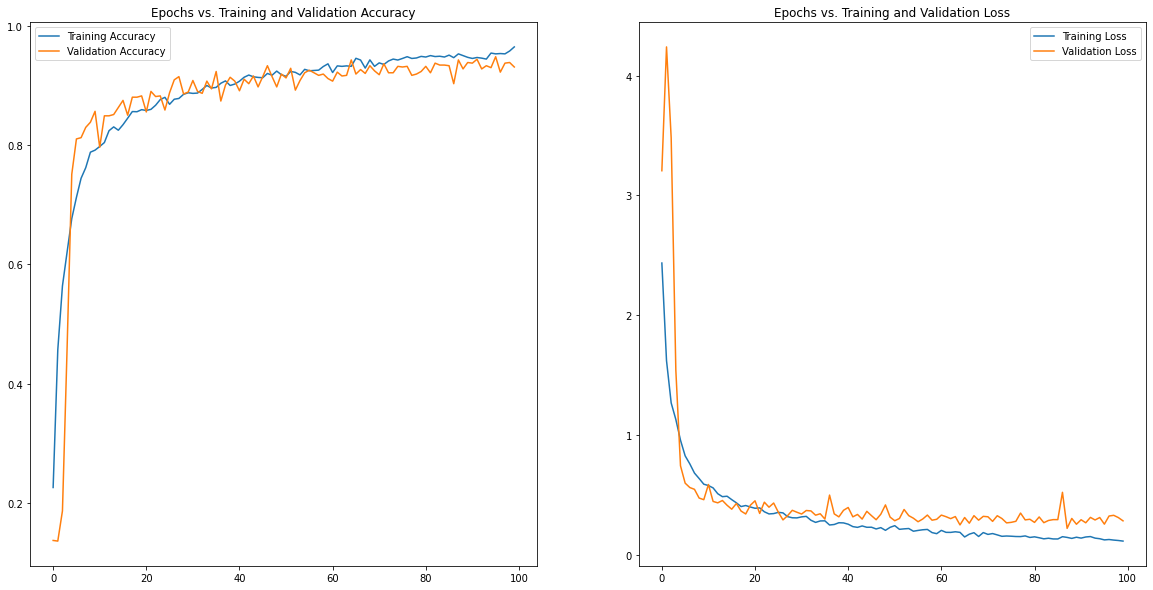

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [ ]:
def create_test_dataset(test_images_dir):
    filenames = []
    test_data = []
    
    for img_file in os.listdir(test_images_dir):
        filenames.append(img_file)

        img = tf.keras.preprocessing.image.load_img(test_images_dir + '/' + img_file)
        img_new = img.resize([256, 256])
        img_array = tf.keras.preprocessing.image.img_to_array(img_new)
        img_array = img_array * 1./255
        test_data.append(img_array)
    
    test_data = np.array(test_data,dtype=np.float32)
    
    return test_data, filenames 

In [ ]:
test_data, filenames  = create_test_dataset('/content/drive/My Drive/CNN/plant-seedlings-classification/test/')

In [ ]:
test_data[1].shape

(256, 256, 3)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("plant_seedling1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("plant_seedling1.h5")

print("Saved model to disk")

Saved model to disk


In [ ]:
train_generator.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [ ]:
type(train_generator.class_indices)

dict

In [ ]:
import pathlib

In [ ]:
class_mapping = {
0:"Black-grass",
1:"Charlock",
2:"Cleavers",
3:"Common-Chickweed",
4:"Common-wheat",
5:"Fat-Hen",
6:"Loose-Silky-bent",
7:"Maize",
8:"Scentless-Mayweed",
9:"Shepherds-Purse",
10:"Small-flowered-Cranesbill",
11:"Sugar-beet",
}

In [ ]:
predicted_class = []
for img in test_data:
    img_instance = np.expand_dims(img, axis=0)
    img_instance_class = model.predict(img_instance)
    img_instance_class = np.argmax(img_instance_class,axis=1)
    img_instance_class = class_mapping.get(img_instance_class[0], np.nan)
    predicted_class.append(img_instance_class)
    pass

In [ ]:
results = pd.DataFrame({"file":filenames,"species":predicted_class})
results.to_csv('submission_final1.csv', index = False)
results.sample(10)

,file,species
749,efe19dc32.png,Charlock
471,8faadb6a8.png,Sugar-beet
723,e901b0f28.png,Fat-Hen
290,5817b766d.png,Shepherds-Purse
348,66ab0e8d0.png,Charlock
572,b39c71707.png,Maize
609,c5e419015.png,Scentless-Mayweed
14,0a64e3e6c.png,Black-grass
738,e73e308be.png,Fat-Hen
392,7696badea.png,Black-grass
